# Applied Statistics Problems

This notebook covers the problems set as part of the assessment for the Applied Statistics module at ATU.

## Problem 1: Extending the Lady Tasting Tea

> Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

> Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

> In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In this section I will be extending the Lady Tasting Tea experiment to determine whether I would consider extending or relaxing the p-value threshold compared to the original design.

I will do this by creating a new experiment using 12 cups: 8 that had the tea added first and 4 with the milk added first. Then I will simulate an experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant identifying all cups by chance and comparing my result with the original 8-cup experiment.

First we begin by importing the required modules to complete the task. First is the math module, which is part of the standard library. We will be using the combinations method from this module

In [39]:
# Importing the math module to use mathematical functions.
# https://docs.python.org/3/library/math.html
import math

# Importing itertools for advanced iteration functions.
# https://docs.python.org/3/library/itertools.html
import itertools

# Importing random for generating random numbers.
# https://docs.python.org/3/library/random.html
import random

# Importing numpy for numerical operations.
# https://numpy.org/doc/stable/
import numpy as np

# Importing pandas for data manipulation and analysis.
# https://pandas.pydata.org/docs/
import pandas as pd

# Importing matplotlib for plotting and visualization.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Importing SciPy for scientific computing.
# https://docs.scipy.org/doc/scipy/
import scipy.stats as stats

Then we declare how many cups of tea are in the experiment and how many of those cups of tea were made by adding the tea first or the milk first.

In [40]:
num_cups = 12
num_cups_tea_first = 8
num_cups_milk_first = 4

Then using the imported math module, we can calculate how many permutations there are of grouping the 12 cups of tea into 4 and 8.

In [41]:
# Calculating the number of ways to choose 4 items from 12 items without regard to the order of selection.
# https://docs.python.org/3/library/math.html#math.comb
math.comb(num_cups, num_cups_milk_first)

495

From this we can see that there are 495 ways we can group 4 of 12.

In [42]:
# Calculating the number of ways to choose 8 items from 12 items without regard to the order of selection.
math.comb(num_cups, num_cups_tea_first)

495

As we can see, choosing 8 from 12 has the same number of permutation as choosing 4. This means that there are exactly 495 ways of grouping the 12 cups of tea into two groups of 8 and 4.

This can be found using [combinations](https://en.wikipedia.org/wiki/Combination) using the formula ${\displaystyle {\binom {n}{k}}={\frac {n(n-1)\dotsb (n-k+1)}{k(k-1)\dotsb 1}}}$ or $ {\displaystyle \textstyle {\frac {n!}{k!(n-k)!}}}$ where $n$ is the number of cups in the experiment and $k$ is the number we would like to choose.

In [43]:
# Assigning variables for clarity.
n = num_cups
k = num_cups_milk_first

# Calculating the number of ways to choose 4 items from 8 items using factorials.
# https://docs.python.org/3/library/math.html#math.factorial
no_of_ways_to_choose_4_from_8 = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Displaying the result.
no_of_ways_to_choose_4_from_8

495

We can make a list of the numbered cups as such:

In [44]:
# We can then create a list of all cups numbered from 0 to 11.
cups = list(range(num_cups))

# Displaying the list.
cups

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We can then create a list of all combinations of 4 cups from a population of 12 cups.

In [45]:
# We can then create a list of all combinations of 4 cups from a population of 12 cups.
combinations_of_4_cups = list(itertools.combinations(cups, num_cups_milk_first))

# Uncomment this line to print the list of combinations.
# combinations_of_4_cups

As we can see, the list has 495 items, the number we calculated earlier.

In [46]:
len(combinations_of_4_cups)

495

We can then decide at random to make the tea in chosen cups with the milk first.

In [47]:
# Randomly sampling 4 cups from the list of 12 cups.
labels_milk = random.sample(cups, 4)

# Sorting the list for easier comparison.
labels_milk.sort()

labels_milk

[3, 4, 7, 8]

We can now compare this to our list of all combinations and see where there is overlap.

In [48]:
# Creating an empty list to store the number of overlaps for each combination.
num_overlaps = []

# Comparing each combination with the labels_milk to find overlaps.
for combination in combinations_of_4_cups:
    s1 = set(combination)
    s2 = set(labels_milk)
    # Finding the intersection (overlap) between the two sets.
    overlap = s1.intersection(s2)
    # Uncomment the following line to print each combination and its overlap with labels_milk.
    # print(f"Combination: {combination}, \t Overlap with labels_milk: {overlap}, \t Number of overlaps: {len(overlap)}")
    # Appending the number of overlaps to the list.
    num_overlaps.append(len(overlap))


In [49]:
overlaps = np.unique(num_overlaps, return_counts=True)
df = pd.DataFrame(list(zip(overlaps[0], overlaps[1])), columns=['Number of Overlaps', 'Count']).set_index('Number of Overlaps')
df

,Count
Number of Overlaps,
0,70
1,224
2,168
3,32
4,1


<Axes: title={'center': 'Distribution of Overlaps between Choice Combinations and Selection'}, xlabel='Number of Overlaps', ylabel='Count'>

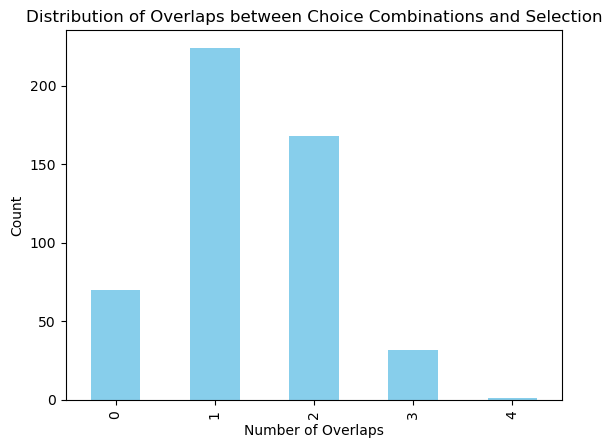

In [50]:
df.plot(kind='bar', legend=False, xlabel='Number of Overlaps', ylabel='Count', title='Distribution of Overlaps between Choice Combinations and Selection', color='skyblue')

In [51]:
total = sum(overlaps[1])

In [52]:
probabilities = (overlaps[1] / total)
probabilities_df = pd.DataFrame(list(zip(overlaps[0], probabilities)), columns=['Number of Overlaps', 'Probability']).set_index('Number of Overlaps')
probabilities_df

,Probability
Number of Overlaps,
0,0.141414
1,0.452525
2,0.339394
3,0.064646
4,0.002020


<Axes: title={'center': 'Probability Distribution of Overlaps between Choice Combinations and Selection'}, ylabel='Probability'>

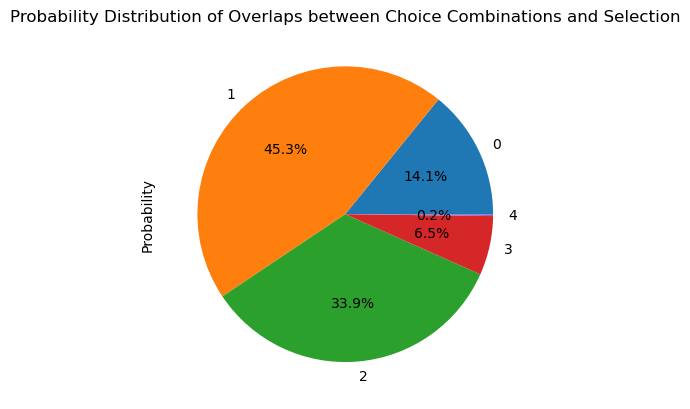

In [53]:
probabilities_df.plot(kind='pie', y='Probability', legend=False, autopct='%1.1f%%', title='Probability Distribution of Overlaps between Choice Combinations and Selection')

If we were to compare this experiment to the original experiment of 4 in 8 correct choices we can also run the numbers for the original experiment.

<Axes: title={'center': 'Probability Distribution of Overlaps between Choice Combinations and Selection (Original Experiment)'}, ylabel='Count'>

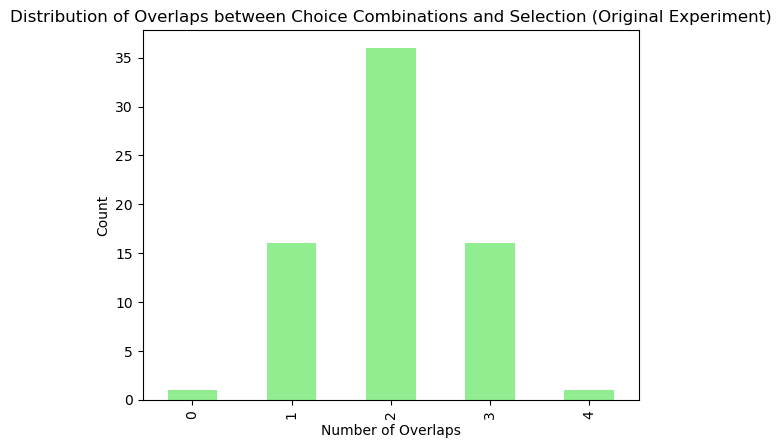

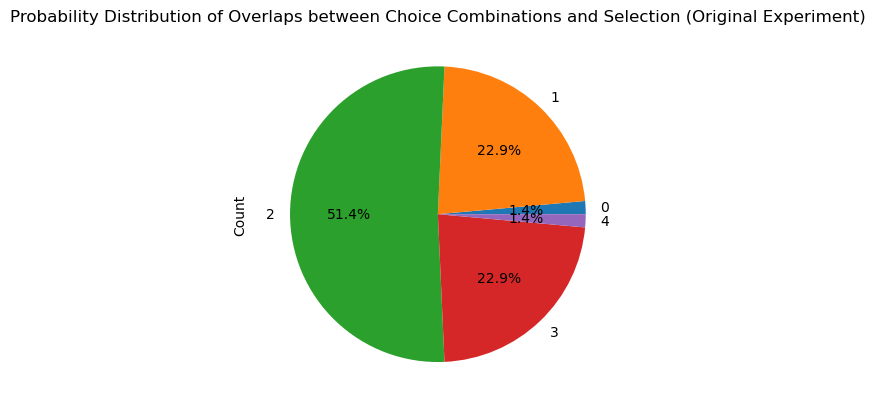

In [54]:
num_cups_original = 8
num_cups_milk_first_original = 4
combinations_of_4_cups_original = list(itertools.combinations(range(num_cups_original), num_cups_milk_first_original))
total_original = len(combinations_of_4_cups_original)
num_overlaps_original = []
labels_milk_original = random.sample(range(num_cups_original), num_cups_milk_first_original)
labels_milk_original.sort()
for combination in combinations_of_4_cups_original:
    s1 = set(combination)
    s2 = set(labels_milk_original)
    overlap = s1.intersection(s2)
    num_overlaps_original.append(len(overlap))

total_original = len(combinations_of_4_cups_original)
combinations_original = np.unique(num_overlaps_original, return_counts=True)
df_original = pd.DataFrame(list(zip(combinations_original[0], combinations_original[1])), columns=['Number of Overlaps', 'Count']).set_index('Number of Overlaps')
df_original.plot(kind='bar', legend=False, xlabel='Number of Overlaps', ylabel='Count', title='Distribution of Overlaps between Choice Combinations and Selection (Original Experiment)', color='lightgreen')
df_original.plot(kind='pie', y='Count', legend=False, autopct='%1.1f%%', title='Probability Distribution of Overlaps between Choice Combinations and Selection (Original Experiment)')


Null Hypothesis:

* The lady is selecting the cups of tea at random.
* The lady has no special power to distinguish cups of tea made with milk first or tea first.

Alternative Hypothesis:

* The lady is able to distinguish between the cups made with milk first and the cups made with tea first.

With a $p$ value, the probability of the lady selecting all 4 cups made with milk first, of $0.002$, it is seemingly very unlikely that the correct 4 cups are chosen at random. Even if at least 3 cups were correctly chosen, it may be fair to say there is some evidence in favour of the alternative hypothesis. It would be expected that at least 1 cup is chosen.

In the original experiment, there were only 8 cups to choose from, so the probability of selecting 4 correct cups from 8 was $1/70$ or $0.014$. In this experiment the $p$ value is $0.002$, which is much smaller. Therefore I would consider extending and not relaxing the p value threshold for this experiment.

## Problem 2: Normal Distribution

> Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Normal distribution

The normal distribution resembles a bell when plotted on a graph. It is centred around a mean $\mu$ and has variance $\sigma^2$. It has the probability density function:

${\displaystyle f(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\,}$



In [55]:
def f(x, mu=0, sigma=1):
    """Probability density function of a normal distribution."""
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return coefficient * exponent

The probability density function calculates the probability of continuous random variable falling between a set of values. Any one value has a probability of 0, so we need to look at a range of values.

We can plot the probability density function with a mean of 0 and a standard deviation of 1 on a graph as follows.

Text(0.5, 1.0, 'Normal Distribution')

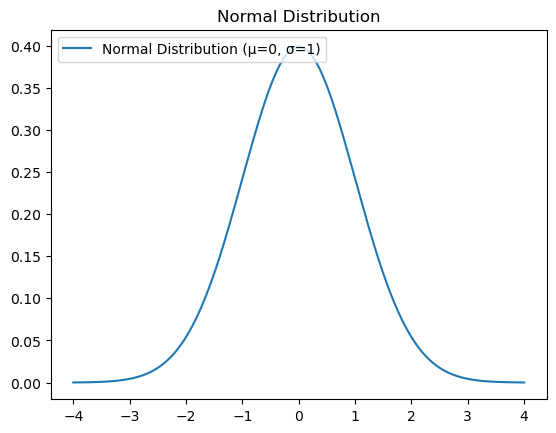

In [56]:
# Creating an array of 1001 x values from -4 to 4.
x = np.linspace(-4, 4, 1001)
# Calculating the corresponding y values using the probability density function.
y = f(x)

# Plotting the normal distribution.
plt.plot(x, y, label='Normal Distribution (μ=0, σ=1)')
plt.legend(loc='upper left')
plt.title('Normal Distribution')

An interesting feature of randomly sampling a distribution is that, according to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), under certain conditions like the sample size being large enough, the samples converge upon a normal distribution. This can be demonstrated by flipping a hundred coins a million times as in the next example.

In [57]:
# Generating 1,000,000 samples from a binomial distribution with n=100 and p=0.5.
n = 100
p = 0.5
k = 1000 * n

flips = np.random.binomial(n, p, k)

uniques, counts = np.unique(flips, return_counts=True)

uniques, counts

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71]),
 array([   2,    4,   13,   28,   54,   96,  137,  279,  414,  741, 1116,
        1581, 2234, 3058, 3901, 4744, 5935, 6622, 7436, 7644, 7861, 7826,
        7280, 6730, 5890, 4814, 3863, 3037, 2193, 1557, 1169,  724,  430,
         238,  171,   96,   44,   27,    4,    2,    4,    1], dtype=int64))

We can plot the results as a bar chart.

Text(0, 0.5, 'Count')

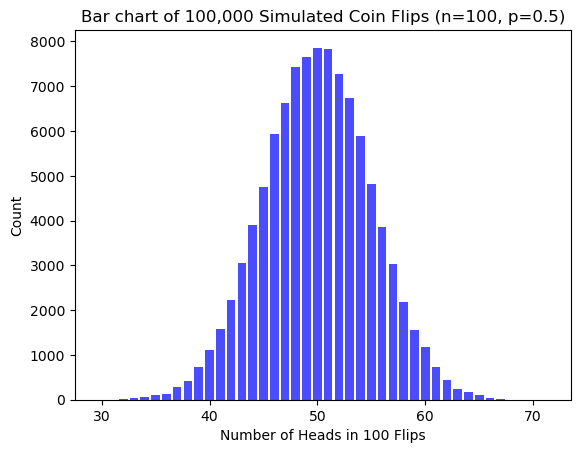

In [58]:
# Plotting the bar chart of the simulated coin flips.
plt.bar(uniques, counts, alpha=0.7, color='blue', label='Histogram of Simulated Coin Flips')
plt.title('Bar chart of 100,000 Simulated Coin Flips (n=100, p=0.5)')
plt.xlabel('Number of Heads in 100 Flips')
plt.ylabel('Count')

If we take the mean and the standard deviation of the generated samples we can plot a bell curve that represents our data. This should mirror our results.

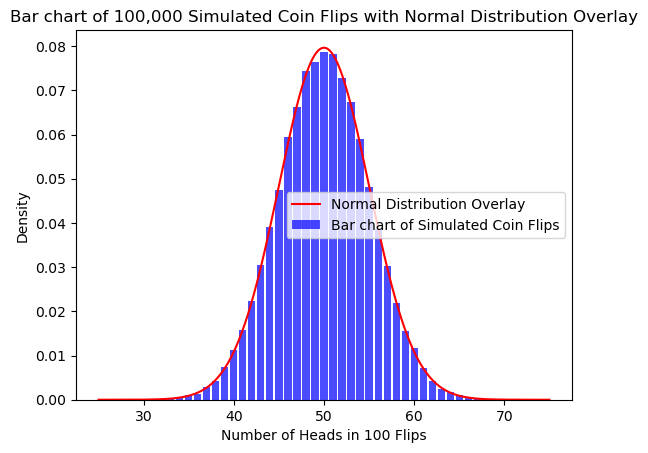

In [59]:
mean_flips = np.mean(flips)
std_flips = np.std(flips)

x = np.linspace(25, 75, 1001)
y = f(x, mu=mean_flips, sigma=std_flips)

# Plotting a bar chart with normal distribution overlay.
# Using density normalization for the bar chart.
plt.bar(uniques, counts/k, alpha=0.7, color='blue', label='Bar chart of Simulated Coin Flips')
plt.plot(x, y, color='red', label='Normal Distribution Overlay')
plt.title('Bar chart of 100,000 Simulated Coin Flips with Normal Distribution Overlay')
plt.xlabel('Number of Heads in 100 Flips')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

The [De Moivre-Laplace Theorem](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem) states that the normal distribution can be used to approximate the binomial distribution. The mean and standard deviation can also be caluclated using this theorem as $\mu = np$ and $\sigma = {\sqrt {np(1-p)}}$.

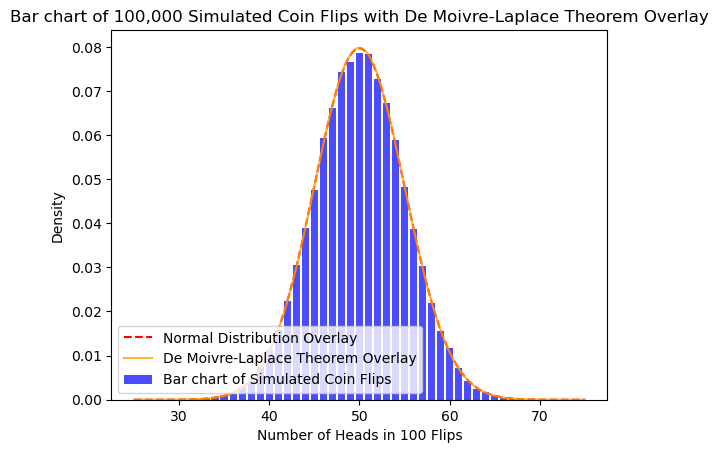

In [60]:
mu_aprox = n * p
sigma_aprox = math.sqrt(n * p * (1 - p))

y_aprox = f(x, mu=mu_aprox, sigma=sigma_aprox)
plt.bar(uniques, counts/k, alpha=0.7, color='blue', label='Bar chart of Simulated Coin Flips')
# I used this reference to plot a dashed line.
# https://www.geeksforgeeks.org/python/how-to-plot-a-dashed-line-in-matplotlib/
plt.plot(x, y, color='red', label='Normal Distribution Overlay', linestyle='dashed')
plt.plot(x, y_aprox, color='orange', label='De Moivre-Laplace Theorem Overlay', alpha=0.8)
plt.title('Bar chart of 100,000 Simulated Coin Flips with De Moivre-Laplace Theorem Overlay')
plt.xlabel('Number of Heads in 100 Flips')
plt.ylabel('Density')
plt.legend(loc='lower left')
plt.show()
plt.close()

As we can see by this graph, the probability density function produced by both methods are exactly the same.

For this problem, we first create the samples of size 10 from the [normal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) and take the standard deviation of each sample. The sample standard deviation is taken with 1 degree of freedom and the population standard deviation is taken with 0 degrees of freedom.

In [61]:
data = np.random.normal(size=(100000,10))

stds_sample = data.std(axis=1, ddof=1)
stds_population = data.std(axis=1, ddof=0)

We can look at the shape of the first element in data and see that it is 10 elements long in one dimension.

In [62]:
data[0,:].shape

(10,)

The overall shape is 100,000 instances of 10 element-long arrays.

In [63]:
data.shape

(100000, 10)

Taking the standard deviations of these values along axis 1 returns 100,000 values, the standard deviations of the 10 element-long arrays, which is what we are looking for.

In [64]:
stds_sample.shape

(100000,)

Then on one axis we can plot the distributions overlapping and transparent.

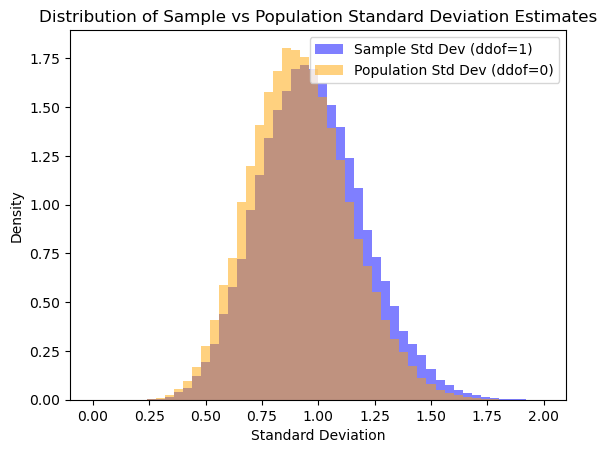

In [65]:
fig, ax = plt.subplots()
ax.hist(stds_sample, bins=np.linspace(0, 2, 51), alpha=0.5, label='Sample Std Dev (ddof=1)', color='blue', density=True)
ax.hist(stds_population, bins=np.linspace(0, 2, 51), alpha=0.5, label='Population Std Dev (ddof=0)', color='orange', density=True)
ax.set_title('Distribution of Sample vs Population Standard Deviation Estimates')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()
plt.close()

[This Medium article](https://medium.com/@gawainchin/understanding-density-in-histograms-why-values-can-exceed-1-10d8ce8721cf) explains why we can have a density greater than 1. As the bins in a histogram get smaller the density can exceed 1 where the width of the bin is less than one. Here our bins are very small with many data points resulting in a density greater than 1. The area under the curve is still 1, but the data is highly concentrated around the mean resulting in a high density value.

In this figure we can see that the standard deviations of the normally distributed data is normally 
distributed. This can be explained by the Central Limit Theorem we saw earlier.

From the wikipedia page on [Sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution#Standard_error) we can find the standard error of the sample mean as:

${\displaystyle \sigma _{\bar {x}}={\frac {\sigma }{\sqrt {n}}}}$

As n becomes larger, the standard deviation of the mean of the sampling distribution becomes smaller. Meaning, as $n$ becomes larger the standard deviation will become smaller.

The sample variance $s^2$  can be calculated as follows:

${\displaystyle s^{2}={\frac {n}{n-1}}{\hat {\sigma }}^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}.}$

## Problem 3: t-Tests

> A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0, 0.1, 0.2, … , 1.0, repeat the following simulation 1,000 times:

> 1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
> 2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
> 3. Record the proportion of times the null hypothesis is not rejected.

> Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

In [119]:
d_array = np.linspace(0, 1, 11)
n_array = np.linspace(0, 11, 12)
data_3 = np.zeros((100, 2))
results = np.zeros((1000, 11))

for i in range(1000):
    for d, n in zip(d_array, n_array):
        data_3[:, 0] = np.random.normal(size=(1, 100))
        data_3[:, 1] = np.random.normal(size=(1, 100), loc=d, scale=1)
        results[i, int(n)] = stats.shapiro(data_3)[1]

In [120]:
results_array = np.array(results)
# https://www.geeksforgeeks.org/python/how-to-get-two-decimal-places-in-python/
round((results_array[results_array[:,1] < 0.05].shape[0]/len(results_array)), 2)

0.05

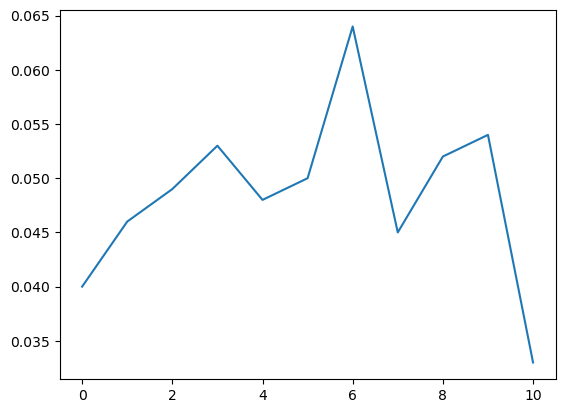

In [121]:
d_proportion = []

for i in range(11):
    d_proportion.append(results[results[:, i] < 0.05].shape[0] / results.shape[0])

plt.plot(d_proportion)

## Problem 4: ANOVA

>Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

> 1. Perform a one-way ANOVA to test whether all three means are equal.
> 2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
> 3. Compare the conclusions.

>Write a short note on why ANOVA is preferred over running several t-tests.

## End